In [18]:
import pandas as pd
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)


In [36]:

# %%

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import bootstrap


df = pd.read_csv("results/all_runs_latest.csv")


In [37]:
df = df[(df['Run ID'].str.startswith('2026012'))]

In [38]:
df.columns

Index(['Model Pair', 'Grid ID', 'Config ID', 'Run ID', 'System Prompt',
       'Context', 'Fog of War', 'Grid', 'Bucket', 'Sub-stratum', 'Pay4Partner',
       'Contract Type', 'Total Turns', 'Format Errors',
       'Non-Cooperative Baseline Player 0',
       'Non-Cooperative Baseline Player 1', 'Total Score', 'Score Player 0',
       'Score Player 1', 'Gini', 'Max Possible Score', 'Reached Goal Player 0',
       'Reached Goal Player 1', 'Total Trades Proposed',
       'Total Trades Proposed Player 0', 'Total Trades Proposed Player 1',
       'Total Trades Accepted', 'Total Trades Accepted Player 0',
       'Total Trades Accepted Player 1', 'Total Trades Rejected',
       'Total Trades Rejected Player 0', 'Total Trades Rejected Player 1',
       'amount_received_by_0_from_trades', 'amount_received_by_1_from_trades',
       'total_trades_failed', 'Total P4P Arrangements Proposed',
       'Total P4P Arrangements Proposed Player 0',
       'Total P4P Arrangements Proposed Player 1',
      

In [11]:
3411/(6*8*80)

0.88828125

In [39]:
df.shape

(3411, 72)

In [12]:
df.groupby(['Model Pair', 'Config ID']).count()

Grid ID  \
Model Pair                    Config ID                                                     
FOUR_1-FOUR_1                 ctx1_fog00_p4pfalse_contract_contract_for_finis...       80   
                              ctx1_fog00_p4pfalse_contract_none_selfish11              80   
                              ctx1_fog00_p4pfalse_contract_strict_selfish11            80   
                              ctx1_fog00_p4pfalse_contract_tile_with_judge_im...       80   
                              ctx1_fog00_p4ptrue_contract_contract_for_finish...       80   
                              ctx1_fog00_p4ptrue_contract_none_selfish11               80   
                              ctx1_fog00_p4ptrue_contract_strict_selfish11             80   
                              ctx1_fog00_p4ptrue_contract_tile_with_judge_imp...       80   
HAIKU_4_5-HAIKU_4_5           ctx1_fog00_p4pfalse_contract_contract_for_finis...       80   
                              ctx1_fog00_p4pfalse_contract_none_selfish11              80   
                              ctx1_fog00_p4pfalse_contract_strict_selfish11            80   
                              ctx1_fog00_p4pfalse_contract_tile_with_judge_im...       80   
                              ctx1_fog00_p4ptrue_contract_contract_for_finish...       80   
                              ctx1_fog00_p4ptrue_contract_none_selfish11               80   
                              ctx1_fog00_p4ptrue_contract_strict_selfish11             80   
                              ctx1_fog00_p4ptrue_contract_tile_with_judge_imp...       80   
LLAMA_MAVERICK-LLAMA_MAVERICK ctx1_fog00_p4pfalse_contract_contract_for_finis...       80   
                              ctx1_fog00_p4pfalse_contract_none_selfish11              80   
                              ctx1_fog00_p4pfalse_contract_strict_selfish11            80   
                              ctx1_fog00_p4pfalse_contract_tile_with_judge_im...       80   
                              ctx1_fog00_p4ptrue_contract_contract_for_finish...       80   
                              ctx1_fog00_p4ptrue_contract_none_selfish11               80   
                              ctx1_fog00_p4ptrue_contract_strict_selfish11             80   
                              ctx1_fog00_p4ptrue_contract_tile_with_judge_imp...       80   
LLAMA_SCOUT-LLAMA_SCOUT       ctx1_fog00_p4pfalse_contract_contract_for_finis...       80   
                              ctx1_fog00_p4pfalse_contract_none_selfish11              80   
                              ctx1_fog00_p4pfalse_contract_strict_selfish11            80   
                              ctx1_fog00_p4pfalse_contract_tile_with_judge_im...       80   
                              ctx1_fog00_p4ptrue_contract_contract_for_finish...       80   
                              ctx1_fog00_p4ptrue_contract_none_selfish11               80   
                              ctx1_fog00_p4ptrue_contract_strict_selfish11             80   
                              ctx1_fog00_p4ptrue_contract_tile_with_judge_imp...       80   
QWEN_3_235B-QWEN_3_235B       ctx1_fog00_p4pfalse_contract_contract_for_finis...       80   
                              ctx1_fog00_p4pfalse_contract_none_selfish11              80   
                              ctx1_fog00_p4pfalse_contract_strict_selfish11            80   
                              ctx1_fog00_p4pfalse_contract_tile_with_judge_im...       80   
                              ctx1_fog00_p4ptrue_contract_contract_for_finish...       80   
                              ctx1_fog00_p4ptrue_contract_none_selfish11               80   
                              ctx1_fog00_p4ptrue_contract_strict_selfish11             80   
                              ctx1_fog00_p4ptrue_contract_tile_with_judge_imp...       80   
QWEN_3_30B-QWEN_3_30B         ctx1_fog00_p4pfalse_contract_contract_for_finis...       26   
                              ctx1_fog00_p4pfalse_contract_none_selfish11          

In [40]:
df['Accuracy'] = df['Total Score'] / df['Max Possible Score']

df['P4P Promise Honour Rate 0'] = df['Total P4P Promises Kept Player 0'] / (df['Total P4P Promises Kept Player 0'] + df['Total P4P Promises Broken Player 0'])
df['P4P Promise Honour Rate 1'] = df['Total P4P Promises Kept Player 1'] / (df['Total P4P Promises Kept Player 1'] + df['Total P4P Promises Broken Player 1'])


In [41]:
config_map = {
    "ctx1_fog00_p4pfalse_contract_contract_for_finishing_selfish11": "Finishing Contract",
    "ctx1_fog00_p4pfalse_contract_none_selfish11": "No Contract",
    "ctx1_fog00_p4pfalse_contract_strict_selfish11": "Strict Contract",
    "ctx1_fog00_p4pfalse_contract_tile_with_judge_implementation_selfish11": "Judge Contract",
    "ctx1_fog00_p4ptrue_contract_contract_for_finishing_selfish11": "P4P Finishing Contract",
    "ctx1_fog00_p4ptrue_contract_none_selfish11": "P4P No Contract",
    "ctx1_fog00_p4ptrue_contract_strict_selfish11": "P4P Strict Contract",
    "ctx1_fog00_p4ptrue_contract_tile_with_judge_implementation_selfish11": "P4P Judge Contract"
}
df['Config Label'] = df['Config ID'].map(config_map)


In [42]:
df['Contract Type'] = df['Contract Type'].fillna('No Contract')

In [15]:
df.head()

,Model Pair,Grid ID,Config ID,Run ID,System Prompt,Context,Fog of War,Grid,Bucket,Sub-stratum,Pay4Partner,Contract Type,Total Turns,Format Errors,Non-Cooperative Baseline Player 0,Non-Cooperative Baseline Player 1,Total Score,Score Player 0,Score Player 1,Gini,Max Possible Score,Reached Goal Player 0,Reached Goal Player 1,Total Trades Proposed,Total Trades Proposed Player 0,Total Trades Proposed Player 1,Total Trades Accepted,Total Trades Accepted Player 0,Total Trades Accepted Player 1,Total Trades Rejected,Total Trades Rejected Player 0,Total Trades Rejected Player 1,amount_received_by_0_from_trades,amount_received_by_1_from_trades,total_trades_failed,Total P4P Arrangements Proposed,Total P4P Arrangements Proposed Player 0,Total P4P Arrangements Proposed Player 1,Total P4P Arrangements Accepted,Total P4P Arrangements Accepted Player 0,Total P4P Arrangements Accepted Player 1,Total P4P Arrangements Rejected,Total P4P Arrangements Rejected Player 0,Total P4P Arrangements Rejected Player 1,Total P4P Promises Kept,Total P4P Promises Kept Player 0,Total P4P Promises Kept Player 1,Total P4P Promises Broken,Total P4P Promises Broken Player 0,Total P4P Promises Broken Player 1,Total P4P Amounts Promised to Receive,Total P4P Amounts Promised to Receive Player 0,Total P4P Amounts Promised to Receive Player 1,Total P4P Amounts Received,Total P4P Amounts Received Player 0,Total P4P Amounts Received Player 1,contract_accepted,contract_negotiaion_length,num_tiles_in_contract,num_tiles_promised_to_receive_from_contract_0,num_tiles_promised_to_receive_from_contract_1,moves_made_under_strict_contract_0,moves_made_under_strict_contract_1,contract_moves_blocked_by_partner_shortfall_0,contract_moves_blocked_by_partner_shortfall_1,points_for_completion_promised_to_0,points_for_completion_promised_to_1,B Min Trades Path,B Max Trades Path,R Min Trades Path,R Max Trades Path,Trade Asymmetry,Accuracy
6,LLAMA_MAVERICK-LLAMA_MAVERICK,0,ctx1_fog00_p4pfalse_contract_contract_for_fini...,20260120_114717_459544_6419c22a,LLAMA_MAVERICK-LLAMA_MAVERICK,True,"[False, False]","[['G', 'R', 'B', 'R'], ['B', 'R', 'R', 'R'], [...",Independent (Both have optimal paths),Independent (Both have optimal paths),False,contract_for_finishing,9,0,70,70,140,70,70,0.000000,140,True,True,3,2,1,1,1,0,2,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,3,0,3,0,1.0
7,QWEN_3_235B-QWEN_3_235B,0,ctx1_fog00_p4pfalse_contract_contract_for_fini...,20260120_114938_631258_480a109e,QWEN_3_235B-QWEN_3_235B,True,"[False, False]","[['G', 'R', 'B', 'R'], ['B', 'R', 'R', 'R'], [...",Independent (Both have optimal paths),Independent (Both have optimal paths),False,contract_for_finishing,7,0,70,70,140,70,70,0.000000,140,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,NaN,0,0,0,0,0,0,0,0,0,3,0,3,0,1.0
8,QWEN_3_30B-QWEN_3_30B,0,ctx1_fog00_p4pfalse_contract_contract_for_fini...,20260120_114954_271301_0640c243,QWEN_3_30B-QWEN_3_30B,True,"[False, False]","[['G', 'R', 'B', 'R'], ['B', 'R', 'R', 'R'], [...",Independent (Both have optimal paths),Independent (Both have optimal paths),False,contract_for_finishing,7,0,70,70,140,70,70,0.000000,140,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,NaN,0,0,0,0,0,0,0,0,0,3,0,3,0,1.0
9,LLAMA_SCOUT-LLAMA_SCOUT,0,ctx1_fog00_p4pfalse_contract_contract_for_fini...,20260120_115047_595733_da6c59b0,LLAMA_SCOUT-LLAMA_SCOUT,True,"[False, False]","[['G', 'R', 'B', 'R'], ['B', 'R', 'R', 'R'], [...",Independent (Both have optimal paths),Independent (Both have optimal paths),False,contract_for_finishing,6,0,70,70,140,73,67,0.021429,140,True,True,2,1,1,1,0,1,1,1,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,NaN,0,0,0,0,0,0,13,0,0,3,0,3,0,1.0
10,FOUR_1-FOUR_1,0,ctx1_fog00_p4pfalse_contract_contract_for_fini...,20260120_130303_454650_899a39e8,default,True,"[False, False]","[['G', 'R', 'B', 'R'], ['B', 'R', 'R', 'R'], [...",Independent (Both have optimal paths),Independent (Both h

In [19]:
df.groupby(['Model Pair', 'Bucket', 'Contract Type', 'Pay4Partner'])[['Accuracy', 'Reached Goal Player 0', 'Reached Goal Player 1']].mean().reset_index()

,Model Pair,Bucket,Contract Type,Pay4Partner,Accuracy,Reached Goal Player 0,Reached Goal Player 1
0,FOUR_1-FOUR_1,Independent (Both have optimal paths),No Contract,False,1.000000,1.000000,1.000000
1,FOUR_1-FOUR_1,Independent (Both have optimal paths),No Contract,True,1.000000,1.000000,1.000000
2,FOUR_1-FOUR_1,Independent (Both have optimal paths),contract_for_finishing,False,1.000000,1.000000,1.000000
3,FOUR_1-FOUR_1,Independent (Both have optimal paths),contract_for_finishing,True,1.000000,1.000000,1.000000
4,FOUR_1-FOUR_1,Independent (Both have optimal paths),strict,False,1.000000,1.000000,1.000000
5,FOUR_1-FOUR_1,Independent (Both have optimal paths),strict,True,1.000000,1.000000,1.000000
6,FOUR_1-FOUR_1,Independent (Both have optimal paths),tile_with_judge_implementation,False,0.971429,0.950000,1.000000
7,FOUR_1-FOUR_1,Independent (Both have optimal paths),tile_with_judge_implementation,True,1.000000,1.000000,1.000000
8,FOUR_1-FOUR_1,Mutual Dependency,No Contract,False,1.000000,1.000000,1.000000
9,FOUR_1-FOUR_1,Mutual Dependency,No Contract,True,0.744643,0.900000,0.550000


In [ ]:
df.head()

,Model Pair,Grid ID,Config ID,Run ID,System Prompt,Context,Fog of War,Grid,Bucket,Sub-stratum,Pay4Partner,Contract Type,Total Turns,Format Errors,Non-Cooperative Baseline Player 0,Non-Cooperative Baseline Player 1,Total Score,Score Player 0,Score Player 1,Gini,Max Possible Score,Reached Goal Player 0,Reached Goal Player 1,Total Trades Proposed,Total Trades Accepted,Total Trades Rejected,Total P4P Arrangements Proposed,Total P4P Arrangements Accepted,Total P4P Arrangements Rejected,Total P4P Promises Kept,Total P4P Promises Broken,amount_received_by_0_from_trades,amount_received_by_1_from_trades,contract_accepted,contract_negotiaion_length,num_tiles_in_contract,num_tiles_promised_to_receive_from_contract_0,num_tiles_promised_to_receive_from_contract_1,moves_made_under_strict_contract_0,moves_made_under_strict_contract_1,points_for_completion_promised_to_0,points_for_completion_promised_to_1,B Min Trades Path,B Max Trades Path,R Min Trades Path,R Max Trades Path,Trade Asymmetry,Accuracy
2333,FOUR_1-FOUR_1,104,ctx1_fog00_p4pfalse_contract_contract_for_fini...,20251217_143345_215731_f5aa809d,default,True,"[False, False]","[['G', 'B', 'B', 'B'], ['R', 'R', 'R', 'B'], [...",Needy Player (Blue),NP-Blue (Need=1),False,contract_for_finishing,8,0,70,0,70,70,0,0.5,140,True,False,4,0,4,0,0,0,0,0,0,0,1,3,NaN,0,0,0,0,10,0,1,3,0,3,1,0.5
2338,FOUR_1-FOUR_1,104,ctx1_fog00_p4pfalse_contract_none,20251217_143345_215413_aa12e560,default,True,"[False, False]","[['G', 'B', 'B', 'B'], ['R', 'R', 'R', 'B'], [...",Needy Player (Blue),NP-Blue (Need=1),False,No Contract,8,0,70,0,70,70,0,0.5,140,True,False,5,0,5,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,3,0,3,1,0.5
2344,FOUR_1-FOUR_1,104,ctx1_fog00_p4pfalse_contract_strict,20251217_143345_215556_3cc96843,default,True,"[False, False]","[['G', 'B', 'B', 'B'], ['R', 'R', 'R', 'B'], [...",Needy Player (Blue),NP-Blue (Need=1),False,strict,8,0,70,0,70,70,0,0.5,140,True,False,6,0,6,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,3,0,3,1,0.5
2355,FOUR_1-FOUR_1,105,ctx1_fog00_p4pfalse_contract_contract_for_fini...,20251217_143345_216103_3a1ff781,default,True,"[False, False]","[['G', 'B', 'B', 'B'], ['R', 'R', 'R', 'B'], [...",Needy Player (Blue),NP-Blue (Need=1),False,contract_for_finishing,8,0,70,0,70,70,0,0.5,140,True,False,3,0,3,0,0,0,0,0,0,0,1,3,NaN,0,0,0,0,12,0,1,3,0,3,1,0.5
2360,FOUR_1-FOUR_1,105,ctx1_fog00_p4pfalse_contract_none,20251217_143345_215813_d49b7821,default,True,"[False, False]","[['G', 'B', 'B', 'B'], ['R', 'R', 'R', 'B'], [...",Needy Player (Blue),NP-Blue (Need=1),False,No Contract,8,0,70,0,70,70,0,0.5,140,True,False,5,0,5,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,3,0,3,1,0.5


## Main plots

In [43]:
df['Model Pair'].unique()

array(['LLAMA_MAVERICK-LLAMA_MAVERICK', 'QWEN_3_235B-QWEN_3_235B',
       'QWEN_3_30B-QWEN_3_30B', 'LLAMA_SCOUT-LLAMA_SCOUT',
       'FOUR_1-FOUR_1', 'HAIKU_4_5-HAIKU_4_5'], dtype=object)

In [44]:
df['Bucket'].unique()

array(['Independent (Both have optimal paths)', 'Mutual Dependency',
       'Needy Player (Blue)'], dtype=object)

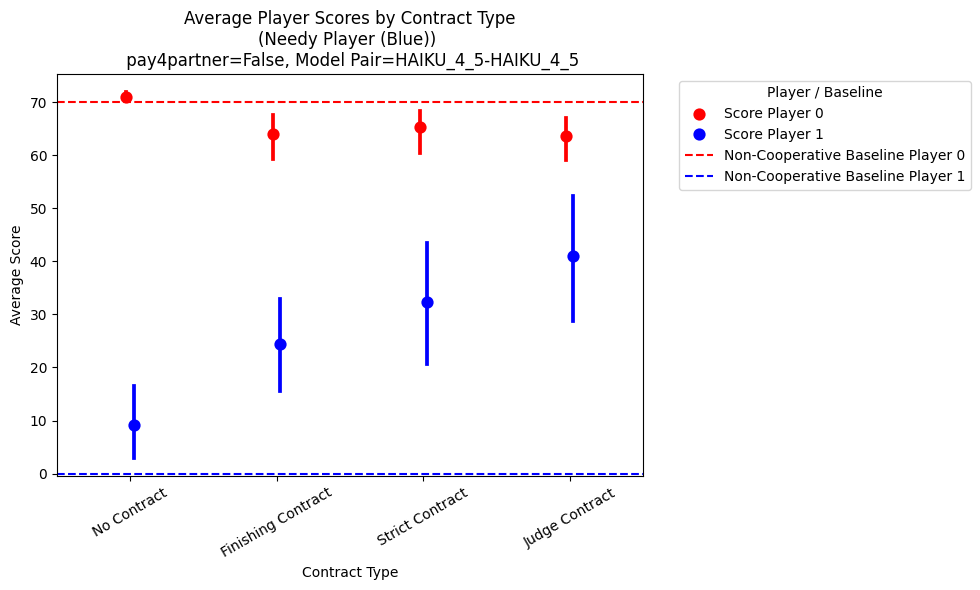

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
RT = df.copy()
# 1. Filter for specific bucket
bucket = 'Needy Player (Blue)'
model_pair = 'HAIKU_4_5-HAIKU_4_5'
p4p = False
subset = RT[(RT['Bucket'] == bucket) & (RT['Model Pair'] == model_pair) & (RT['Pay4Partner'] == p4p)].copy()
#  &(RT['Reached Goal Player 1'] == True)

# 2. Map Config ID to friendly names

# 3. Ensure consistent order
order = ["No Contract", "Finishing Contract", "Strict Contract", "Judge Contract"]
subset['Config Label'] = pd.Categorical(subset['Config Label'], categories=order, ordered=True)

# 4. Reshape to long format for plotting
df_long = subset.melt(
    id_vars=['Config Label'],
    value_vars=['Score Player 0', 'Score Player 1'],
    var_name='Player',
    value_name='Score'
)

# 5. Compute average baseline scores
baseline_p0 = subset['Non-Cooperative Baseline Player 0'].mean()
baseline_p1 = subset['Non-Cooperative Baseline Player 1'].mean()

# 6. Point plot with custom colors
plt.figure(figsize=(10, 6))
sns.pointplot(
    data=df_long,
    x='Config Label',
    y='Score',
    hue='Player',
    order=order,
    errorbar='ci',
    dodge=True,
    markers='o',
    linestyles='',
    palette={
        'Score Player 0': 'red',
        'Score Player 1': 'blue'
    }
)

# 7. Add horizontal dotted lines for baseline
plt.axhline(y=baseline_p0, color='red', linestyle='--', label='Non-Cooperative Baseline Player 0')
plt.axhline(y=baseline_p1, color='blue', linestyle='--', label='Non-Cooperative Baseline Player 1')

# 8. Formatting
plt.ylabel('Average Score')
plt.xlabel('Contract Type')
plt.title(f"Average Player Scores by Contract Type\n({bucket}) \n pay4partner={p4p}, Model Pair={model_pair}")
plt.xticks(rotation=30)

# Combine legends: get handles and labels from plot and axhline
handles, labels = plt.gca().get_legend_handles_labels()
# remove duplicate labels for players
from collections import OrderedDict
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Player / Baseline', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## P4P Honour Rate

In [45]:
subset = df[
    (df["Model Pair"] == model_pair) &
    (df["Bucket"] == bucket) &
    (df["Pay4Partner"] == p4p_value)
].copy()

In [46]:
subset['Contract Type'].unique()

array(['contract_for_finishing', 'No Contract', 'strict',
       'tile_with_judge_implementation'], dtype=object)

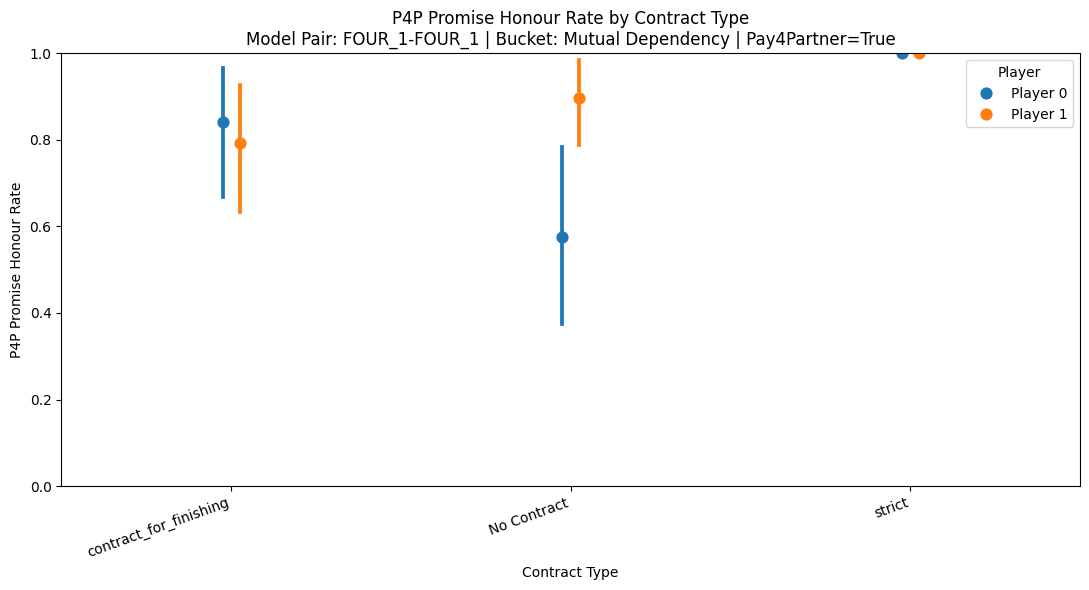

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- user controls ---
model_pair = "FOUR_1-FOUR_1"   # change as needed
bucket = "Mutual Dependency"                 # change as needed (must match your df['Bucket'] values)
p4p_value = True              # fixed True per your request

# --- filter ---
subset = df[
    (df["Model Pair"] == model_pair) &
    (df["Bucket"] == bucket) &
    (df["Pay4Partner"] == p4p_value)
].copy()

# Optional: drop rows missing the honour-rate columns
subset = subset.dropna(subset=["P4P Promise Honour Rate 0", "P4P Promise Honour Rate 1", "Contract Type"])

# --- reshape long for plotting ---
df_long = subset.melt(
    id_vars=["Contract Type"],
    value_vars=["P4P Promise Honour Rate 0", "P4P Promise Honour Rate 1"],
    var_name="Player",
    value_name="Honour Rate"
)

# Clean up legend labels (optional)
df_long["Player"] = df_long["Player"].replace({
    "P4P Promise Honour Rate 0": "Player 0",
    "P4P Promise Honour Rate 1": "Player 1",
})

# Optional: enforce contract order (customize as needed)
# order = ["none", "strict", "contract_for_finishing", "tile_with_judge_implementation"]
# df_long["Contract Type"] = pd.Categorical(df_long["Contract Type"], categories=order, ordered=True)

# --- plot (mean + confidence interval error bars) ---
plt.figure(figsize=(11, 6))
ax = sns.pointplot(
    data=df_long,
    x="Contract Type",
    y="Honour Rate",
    hue="Player",
    errorbar="ci",   # mean with 95% CI; use errorbar="sd" if you prefer
    dodge=True,
    markers="o",
    linestyles=""
)

ax.set_title(f"P4P Promise Honour Rate by Contract Type\nModel Pair: {model_pair} | Bucket: {bucket} | Pay4Partner=True")
ax.set_xlabel("Contract Type")
ax.set_ylabel("P4P Promise Honour Rate")
ax.set_ylim(0, 1)  # assuming rates are 0..1
plt.xticks(rotation=20, ha="right")
plt.legend(title="Player", loc="best")
plt.tight_layout()
plt.show()

In [25]:
df = df.sort_values(by=['Model Pair', 'Grid ID', 'Config ID', 'Total Score'], ascending=[True, True, True, False])
df = df.drop_duplicates(subset=['Model Pair', 'Grid ID', 'Config ID'], keep='first')


## Completion and Scoring Metrics
Zero sum game when they finish so maybe total points and accuracy aren't that interesting, as they're really just describing the following metrics which we care about:
- both players finished vs baseline
- both players meet baseline score
- (for needy and MD): both players beat baseline
    - per player beat baseline

## Trade Level Metrics and Questions
- relationship between trade acceptance rate and both players finished

## P4P
- Total P4P Promises Broken

## Contract level
- Relationship between contract agreed and both complete or number complete
    This could be a heatmap, grouped barchart or mosaic map (agreed vs not and completion vs not (or number completions))
- Relationship between num points swapped for completion and number complete

In [26]:

mapping = {'ctx1_fog00_p4pfalse_contract_contract_for_finishing': 'contract_for_finishing',
       'ctx1_fog00_p4pfalse_contract_none': 'regular_trading',
       'ctx1_fog00_p4pfalse_contract_strict': 'strict_tile_contracts',
       'ctx1_fog00_p4pfalse_contract_tile_with_judge_implementation': 'tile_contract_with_llm_implementation',
       'ctx1_fog00_p4ptrue_contract_none': 'p4p'
}
df['game_type'] = df['Config ID'].map(mapping)

df['Non-Cooperative Baseline Player R'] = df['Non-Cooperative Baseline Player 0']
df['Non-Cooperative Baseline Player B'] = df['Non-Cooperative Baseline Player 1']
df['Score Player R'] = df['Score Player 0']
df['Score Player B'] = df['Score Player 1']
df['R_achieves_baseline'] = df['Score Player 0'] >= df['Non-Cooperative Baseline Player 0']
df['B_achieves_baseline'] = df['Score Player 1'] >= df['Non-Cooperative Baseline Player 1']
df['Reached Goal Player R'] = df['Reached Goal Player 0']
df['Reached Goal Player B'] = df['Reached Goal Player 1']
df['both_achieve_baseline'] = df['R_achieves_baseline'] & df['B_achieves_baseline']
df['R_beats_baseline'] = df['Score Player R'] > df['Non-Cooperative Baseline Player 0']
df['B_beats_baseline'] = df['Score Player B'] > df['Non-Cooperative Baseline Player 1']
df['both_beat_baseline'] = (df['R_beats_baseline']) & (df['B_beats_baseline'])
df['both_finished'] = (df['Reached Goal Player 0'] > 0) & (df['Reached Goal Player 1'] > 0)
df['either_finished'] = (df['Reached Goal Player 0'] > 0) | (df['Reached Goal Player 1'] > 0)
df['both_finished_and_achieve_baseline'] = (df['both_finished']) & (df['both_achieve_baseline'])
df['both_finished_and_beat_baseline'] = (df['both_finished']) & (df['both_beat_baseline'])
df['p4p_honor_rate'] = 1 - (df['Total P4P Promises Broken'] / (df['Total P4P Promises Kept'] + df['Total P4P Promises Broken'])).replace([np.inf, -np.inf], np.nan)

desired_order = ['regular_trading', 'p4p', 'contract_for_finishing', 'strict_tile_contracts', 'tile_contract_with_llm_implementation']
df['game_type'] = pd.Categorical(df['game_type'], categories=desired_order, ordered=True)


In [28]:
df = df[df['Model Pair'] == "FOUR_1-FOUR_1"].copy()

In [29]:
def calculate_bootstrap_ci(data, n_resamples=1000, confidence_level=0.68):
    """
    Calculate bootstrap confidence intervals for the mean.
    """
    if len(data) == 0:
        return (np.nan, np.nan)  # Return NaN if no data is available

    # Use scipy.stats.bootstrap to calculate the confidence interval
    res = bootstrap((data,), np.mean, confidence_level=confidence_level, n_resamples=n_resamples, method='basic')
    return res.confidence_interval.low, res.confidence_interval.high


In [30]:

def plot_metrics(df, column, for_loop='Model Pair', legend= 'game_type', x_axis='Bucket',
                 specific_model_pairs=None,
                 specific_game_types=None,
                 specific_buckets=None):
    
    # Ensure the data has the required columns
    required_columns = [for_loop, legend, x_axis, column]
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"DataFrame must contain the following columns: {required_columns}")

    for_loop_values = df[for_loop].unique()

    for iterable in for_loop_values:
        filtered_df = df[df[for_loop] == iterable].copy()
        if specific_buckets is not None:
            filtered_df = filtered_df[filtered_df['Bucket'].isin(specific_buckets)]
        if specific_model_pairs is not None:
            filtered_df = filtered_df[filtered_df['Model Pair'].isin(specific_model_pairs)]
        if specific_game_types is not None:
            filtered_df = filtered_df[filtered_df['game_type'].isin(specific_game_types)]
            filtered_df['game_type'] = filtered_df['game_type'].cat.remove_unused_categories()
        if filtered_df.empty:
            continue
        grouped = filtered_df.groupby([x_axis, legend], observed=True).agg(
                grouped_col_mean=(column, 'mean'),
                grouped_col_count=(column, 'count'), # count of values for each bar
            ).reset_index()
        grouped[f'{column}_ci'] = grouped.apply(
            lambda row: calculate_bootstrap_ci(
                filtered_df[
                    (filtered_df[x_axis] == row[x_axis]) &
                    (filtered_df[legend] == row[legend])
                ][column]
            ),
            axis=1
        )

        grouped[f'{column}_lower'] = grouped[f'{column}_ci'].apply(lambda x: x[0])
        grouped[f'{column}_upper'] = grouped[f'{column}_ci'].apply(lambda x: x[1])
        grouped[f'{column}_err_lower'] = grouped['grouped_col_mean'] - grouped[f'{column}_lower']
        grouped[f'{column}_err_upper'] = grouped[f'{column}_upper'] - grouped['grouped_col_mean']
        plt.figure(figsize=(12, 8))

        ax = sns.barplot(
            data=grouped,
            x=x_axis,
            y='grouped_col_mean',
            hue=legend,
            palette='Set2',
            errorbar=None
        )

        # Loop over the containers (one per hue/category)
        # Loop over containers (one per hue)
        # Loop over the containers (one per hue/category)
        for container, legend_value in zip(ax.containers, grouped[legend].unique()):
            # Get the rows corresponding to this bucket
            legend_value_rows = grouped[grouped[legend] == legend_value].sort_values(x_axis)
            
            for bar, (_, row) in zip(container, legend_value_rows.iterrows()):
                x = bar.get_x() + bar.get_width() / 2  # Center of the bar
                yerr = [[row['grouped_col_mean'] - row[f'{column}_lower']], 
                        [row[f'{column}_upper'] - row['grouped_col_mean']]]
                plt.errorbar(
                    x=x,
                    y=row['grouped_col_mean'],
                    yerr=yerr,
                    fmt='none',
                    color='black',
                    capsize=5
                )
                y = row['grouped_col_mean']                
                    # Add count on top of the bar
                plt.text(
                    x=x + bar.get_width() / 3,
                    y=y + (row[f'grouped_col_mean'] - y) + 0.01,  # slightly above the error bar
                    s= f'n: {str(row['grouped_col_count'])}',
                    ha='center',
                    va='bottom',
                    fontsize=10
                )

        plt.title(f'{column} Across Game Types ({for_loop}: {iterable})')
        plt.xlabel(x_axis)
        plt.ylabel(column)
        plt.legend(title=legend, loc='lower left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


        

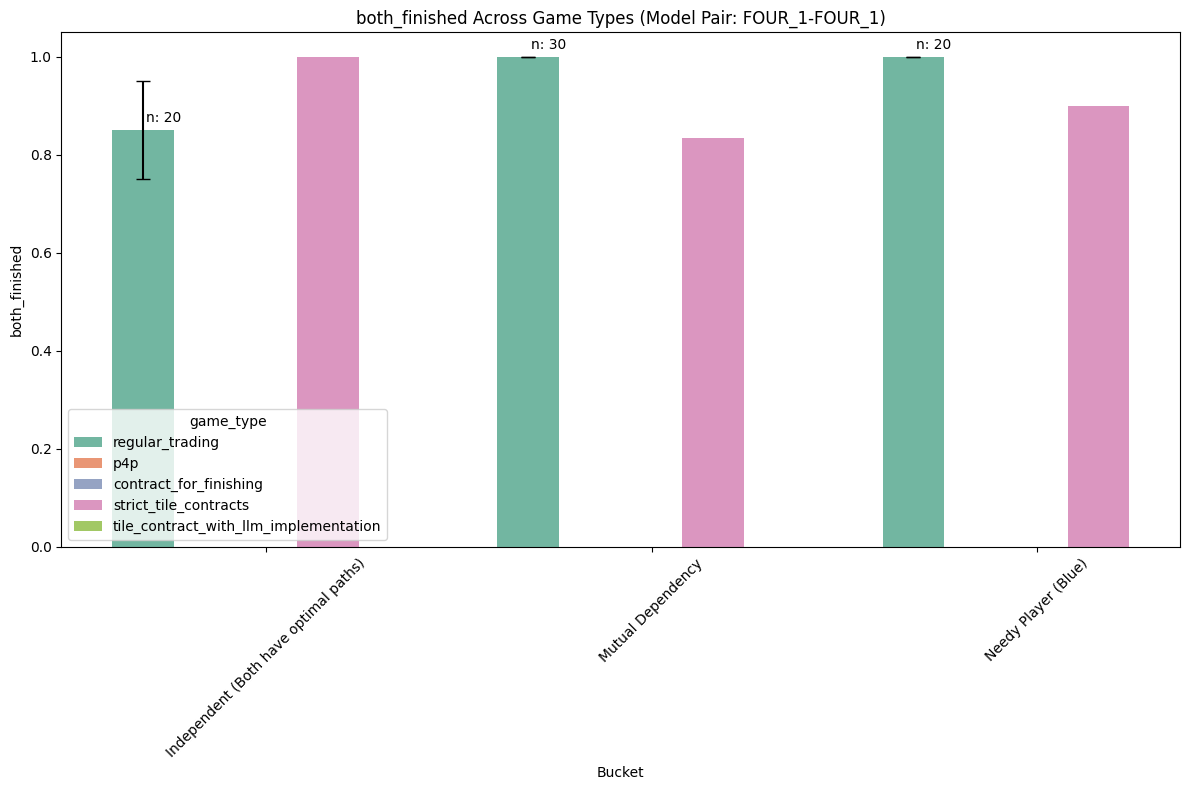

In [31]:
plot_metrics(df, 'both_finished', legend='game_type', x_axis='Bucket')

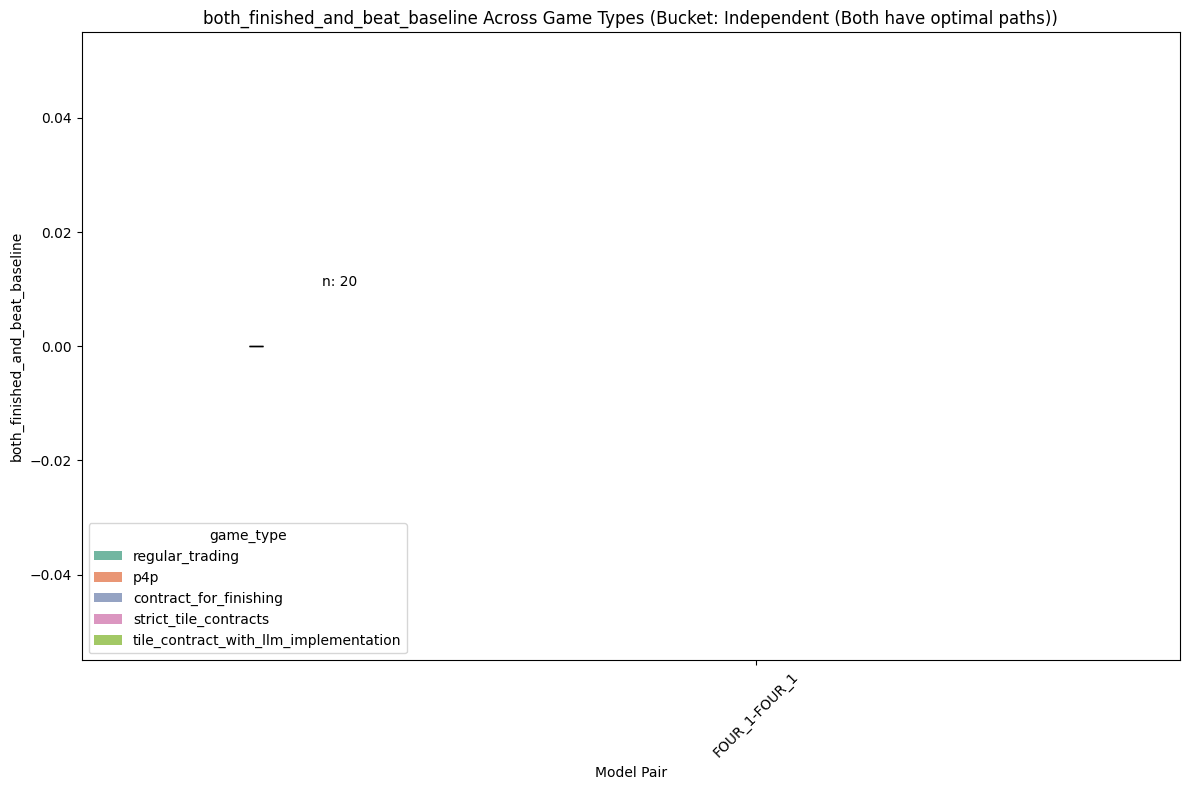

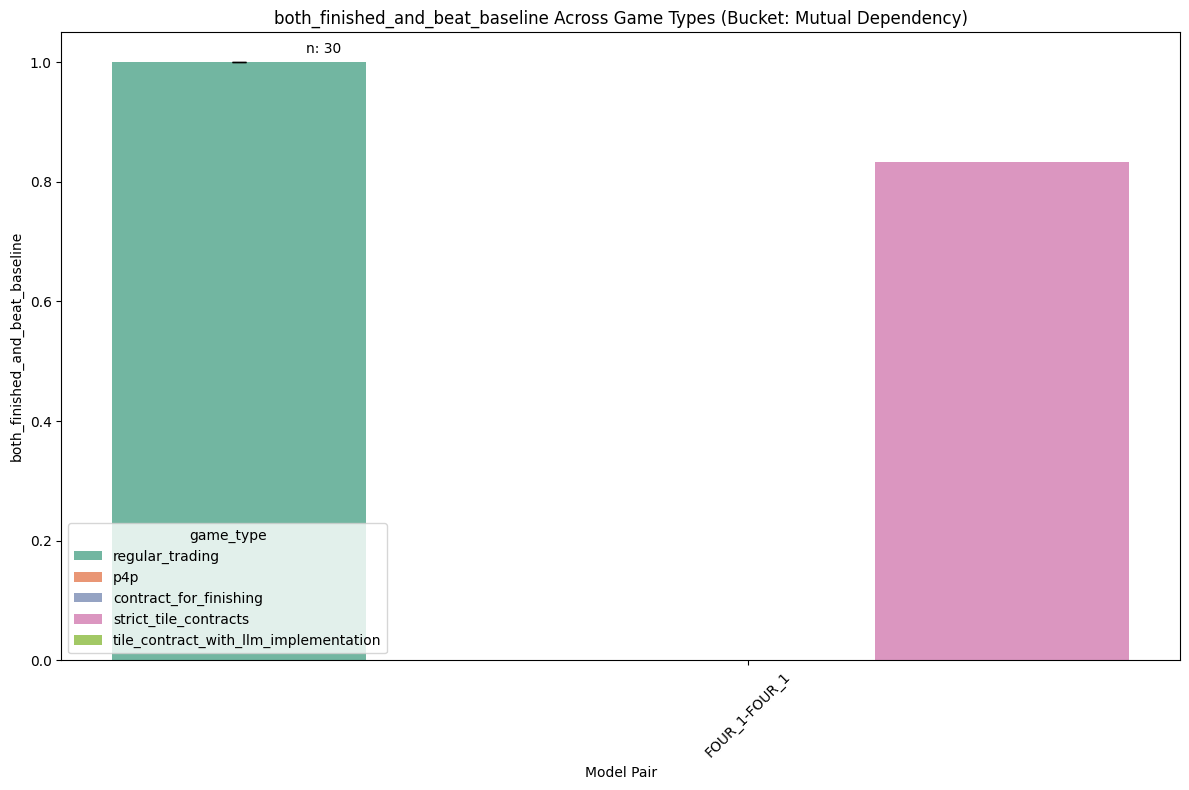

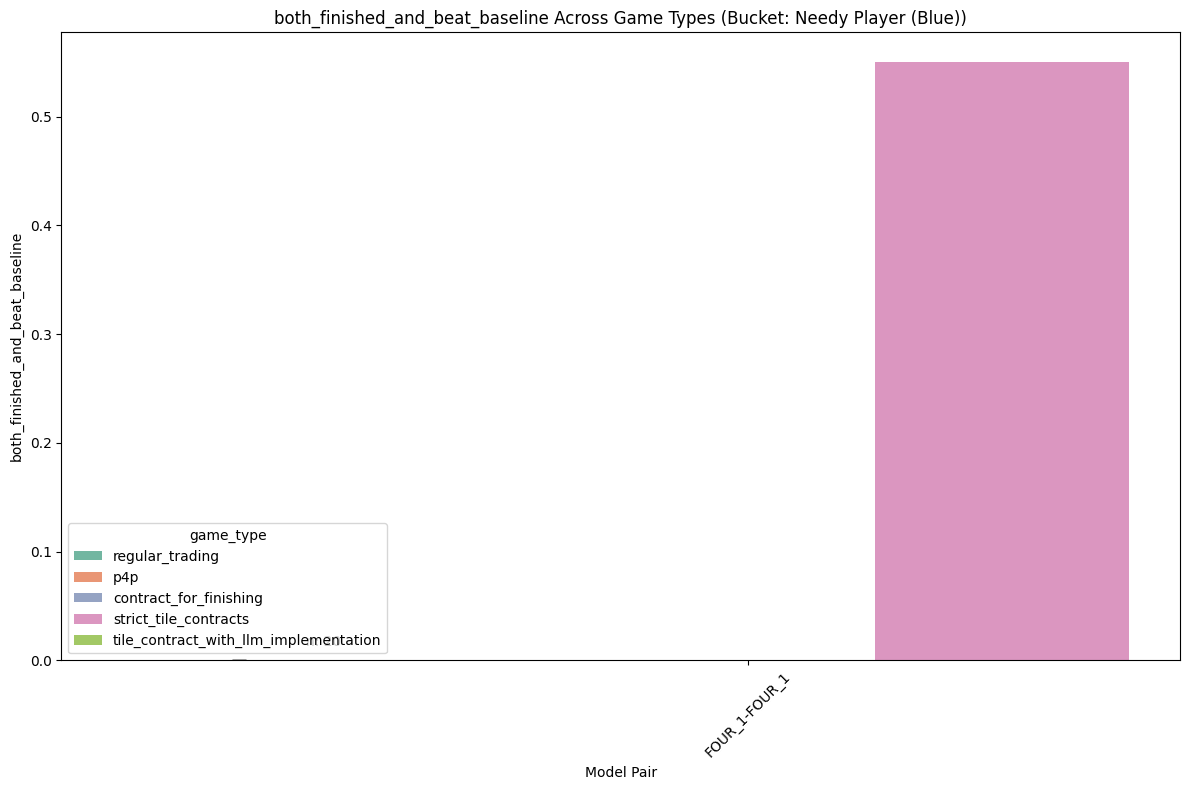

In [32]:
plot_metrics(df, 'both_finished_and_beat_baseline', for_loop='Bucket', legend='game_type', x_axis='Model Pair')

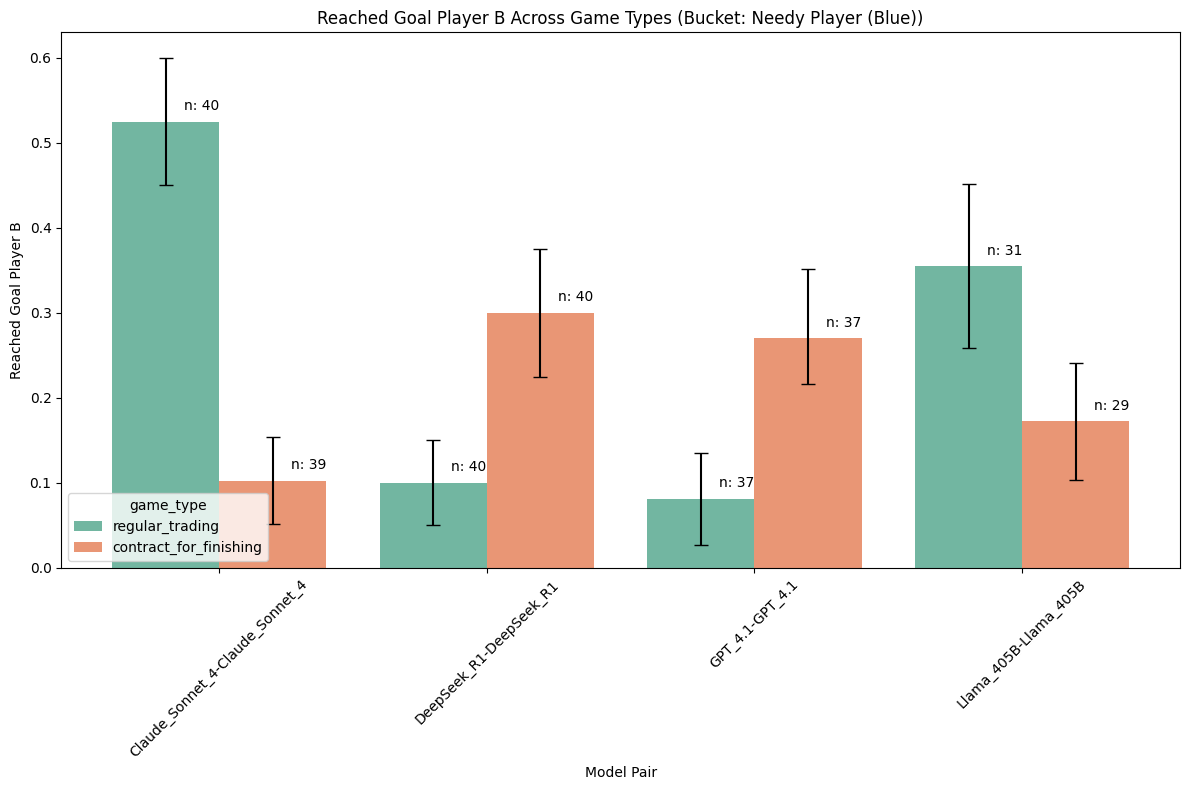

In [298]:
plot_metrics(df, 'Reached Goal Player B', for_loop='Bucket', legend= 'game_type', x_axis='Model Pair',
                 specific_model_pairs=None,
                 specific_game_types=['regular_trading', 'contract_for_finishing'],
                 specific_buckets=['Needy Player (Blue)'])

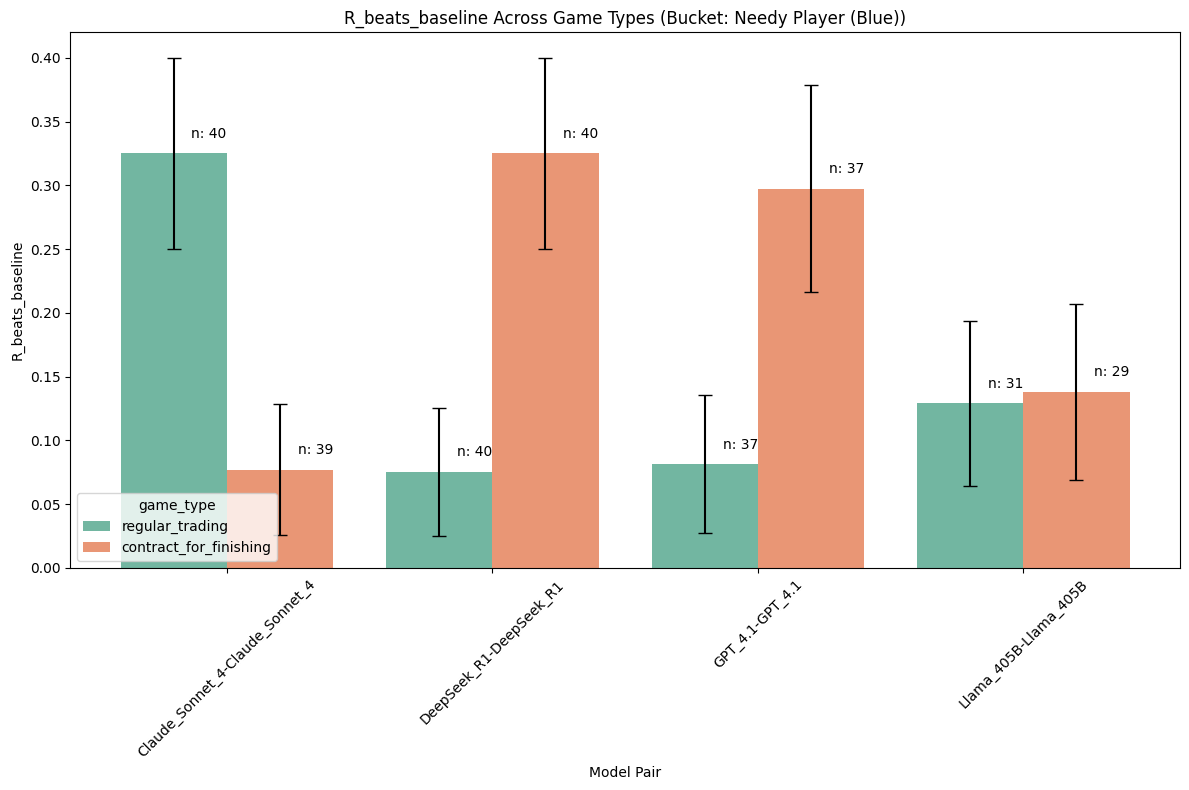

In [303]:
plot_metrics(df, 'R_beats_baseline', for_loop='Bucket', legend= 'game_type', x_axis='Model Pair',
                 specific_model_pairs=None,
                 specific_game_types=['regular_trading', 'contract_for_finishing'],
                 specific_buckets=['Needy Player (Blue)'])

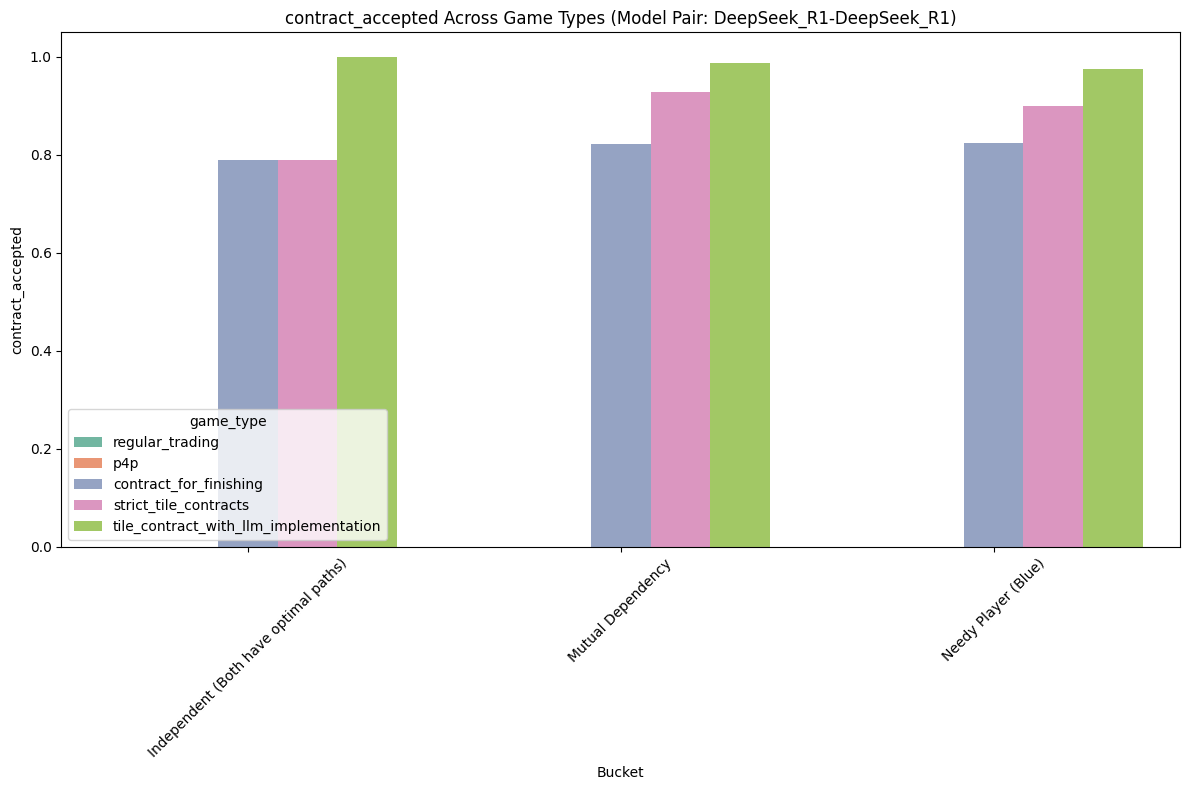

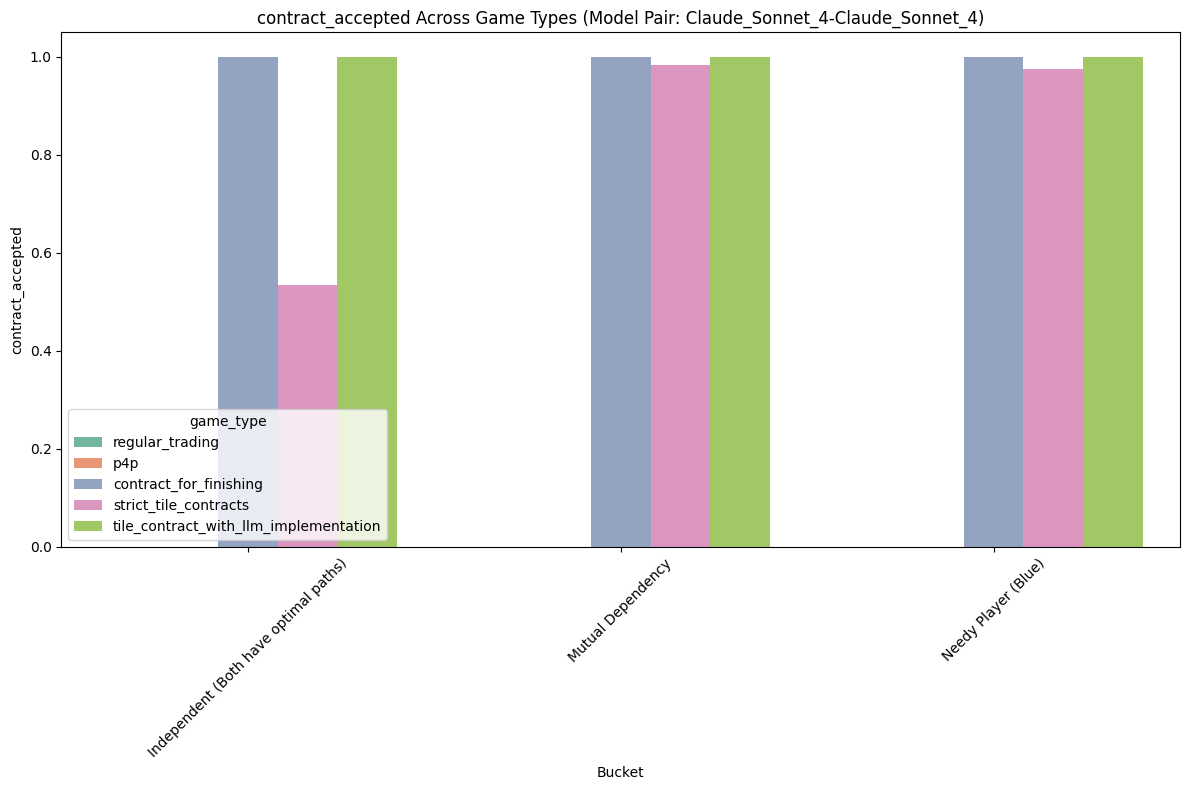

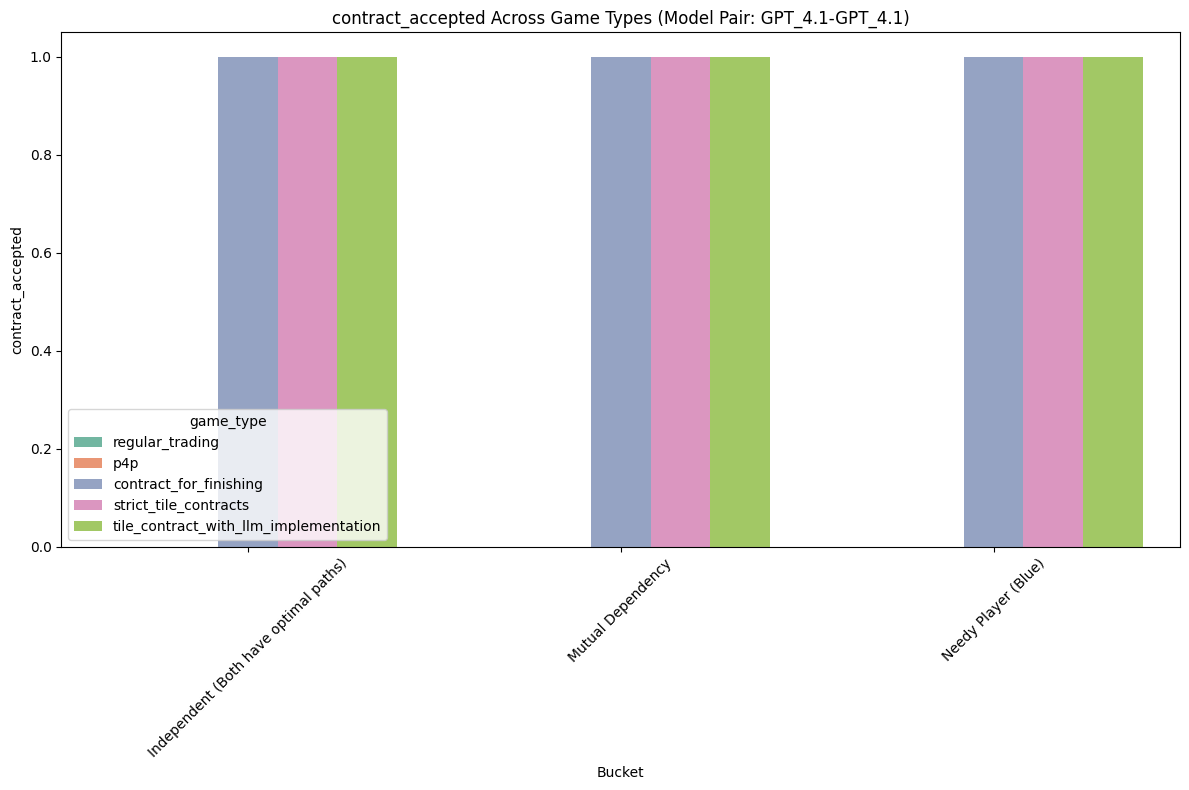

In [215]:
plot_metrics(df, 'contract_accepted')

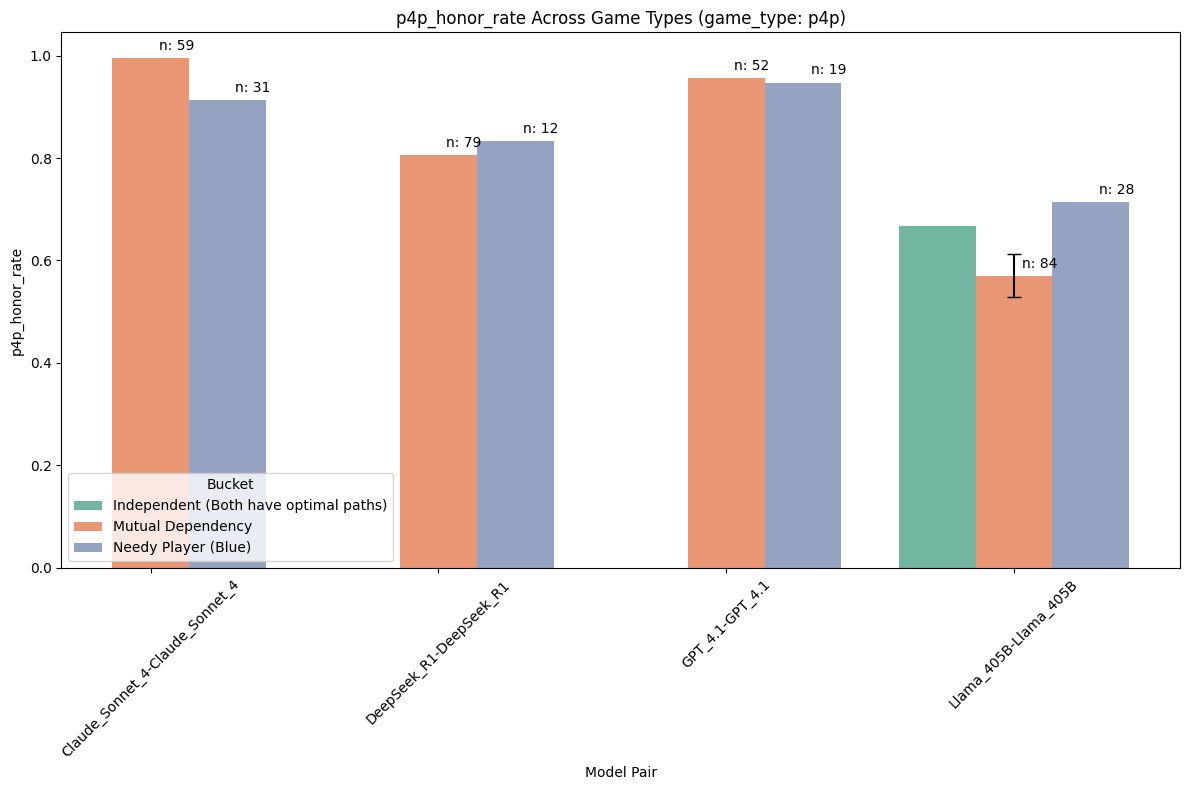

In [304]:
plot_metrics(df, 'p4p_honor_rate', for_loop='game_type', legend= 'Bucket', x_axis='Model Pair', specific_game_types=['p4p'])

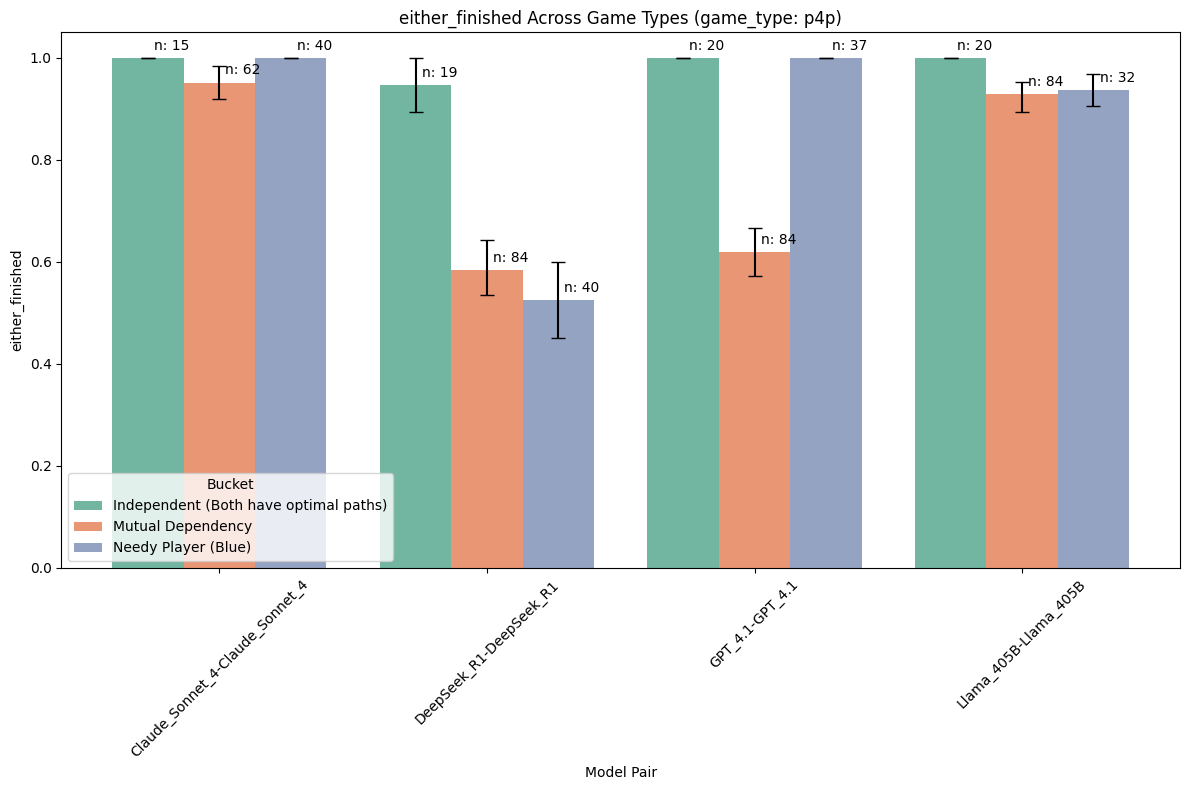

In [305]:
plot_metrics(df, 'either_finished', for_loop='game_type', legend= 'Bucket', x_axis='Model Pair', specific_game_types=['p4p'])

Question: is there a contract type that helps fog of war a lot? which fog of war does it help the most?